In [1]:
# Impor librariesa
import pandas as pd
import nba_api as nba
import time
import matplotlib.pyplot as plt
import seaborn as sns
from src.components.nbadataprocesser import NBADataProcesser
from config import config_variables

In [2]:
# Import training data
nba_processer = NBADataProcesser(config_variables)
training_df = nba_processer.load_training_set()

In [4]:
training_df.columns

Index(['MATCHUP', 'GAME_DATE"', 'WIN', 'TOTAL_POINTS', 'W_PCT_L_S',
       'W_PCT_L_G', 'W_PCT_A_S', 'W_PCT_A_G', 'W_RANK_L_S', 'W_RANK_L_G',
       'W_RANK_A_S', 'W_RANK_A_G', 'PLUS_MINUS_RANK_L_S',
       'PLUS_MINUS_RANK_L_G', 'PLUS_MINUS_RANK_A_S', 'PLUS_MINUS_RANK_A_G',
       'PTS_RANK_L_S', 'PTS_RANK_L_G', 'PTS_RANK_A_S', 'PTS_RANK_A_G',
       'REB_RANK_L_S', 'REB_RANK_L_G', 'REB_RANK_A_S', 'REB_RANK_A_G',
       'AST_RANK_L_S', 'AST_RANK_L_G', 'AST_RANK_A_S', 'AST_RANK_A_G',
       'BLK_RANK_L_S', 'BLK_RANK_L_G', 'BLK_RANK_A_S', 'BLK_RANK_A_G',
       'TOV_RANK_L_S', 'TOV_RANK_L_G', 'TOV_RANK_A_S', 'TOV_RANK_A_G',
       'STL_RANK_L_S', 'STL_RANK_L_G', 'STL_RANK_A_S', 'STL_RANK_A_G',
       'FG3A_RANK_L_S', 'FG3A_RANK_L_G', 'FG3A_RANK_A_S', 'FG3A_RANK_A_G',
       'FG3_PCT_RANK_L_S', 'FG3_PCT_RANK_L_G', 'FG3_PCT_RANK_A_S',
       'FG3_PCT_RANK_A_G', 'FGA_RANK_L_S', 'FGA_RANK_L_G', 'FGA_RANK_A_S',
       'FGA_RANK_A_G', 'FG_PCT_RANK_L_S', 'FG_PCT_RANK_L_G', 'FG_PCT_RANK_A_S',
 

In [29]:
#sample_df["W_PCT_DIFF_GLOBAL"] = sample_df["W_PCT_LOCAL_GLOBAL"] - sample_df["W_PCT_AWAY_GLOBAL"]

In [30]:
def column_study_distribution(df, column_study, target_variable):

    sns.displot(df, x=column_study, hue=target_variable, multiple="stack")

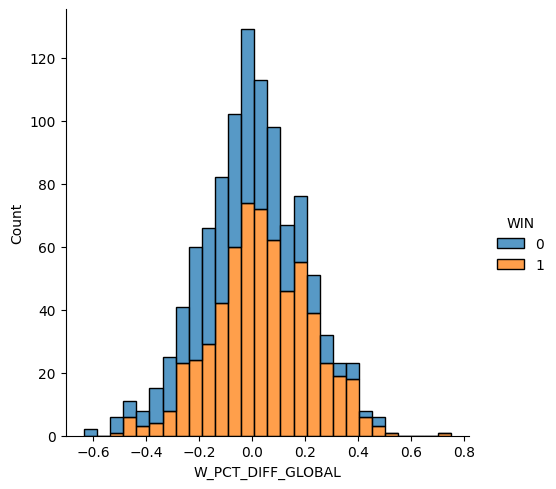

In [17]:
column_study_distribution(sample_df, "W_PCT_DIFF_GLOBAL", "WIN")

<AxesSubplot: >

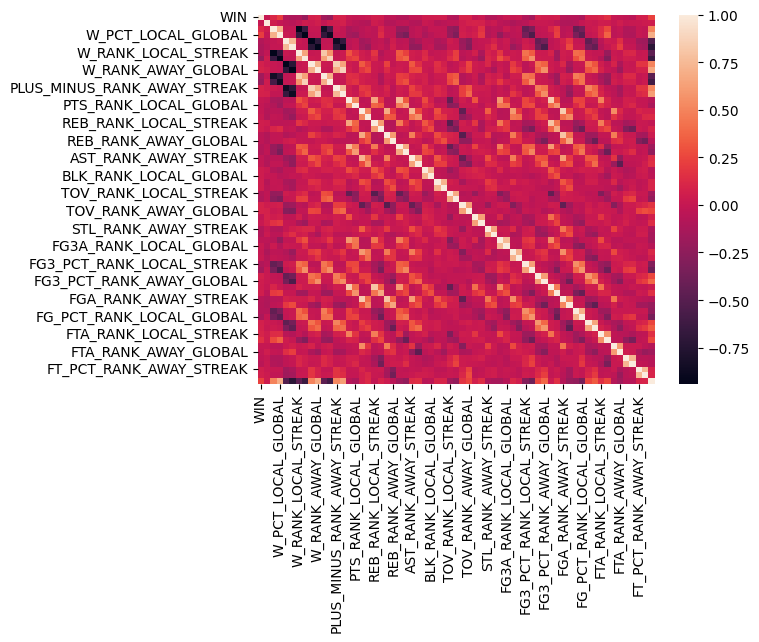

In [18]:
sns.heatmap(sample_df.corr())

In [23]:
sample_df.corr()["WIN"].sort_values(ascending=False)

WIN                             1.000000
W_PCT_DIFF_GLOBAL               0.227626
W_PCT_LOCAL_GLOBAL              0.212453
FTA_RANK_LOCAL_GLOBAL           0.152926
W_PCT_LOCAL_STREAK              0.116809
                                  ...   
FG_PCT_RANK_LOCAL_GLOBAL       -0.115945
FG3_PCT_RANK_LOCAL_GLOBAL      -0.145574
PLUS_MINUS_RANK_LOCAL_STREAK   -0.161419
W_RANK_LOCAL_GLOBAL            -0.206242
PLUS_MINUS_RANK_LOCAL_GLOBAL   -0.211354
Name: WIN, Length: 63, dtype: float64

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

features = [
    "W_PCT_LOCAL_GLOBAL", "W_PCT_LOCAL_STREAK", "PLUS_MINUS_RANK_LOCAL_GLOBAL", "W_RANK_LOCAL_GLOBAL", "PLUS_MINUS_RANK_LOCAL_STREAK", 
    "W_PCT_AWAY_GLOBAL", "W_PCT_AWAY_STREAK"
]
y = sample_df["WIN"]
X = sample_df.drop(['MATCHUP', 'GAME_DATE', 'WIN', 'TOTAL_POINTS'], axis=1)
X = sample_df[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=100, max_features = 1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=1, random_state=0)

In [64]:
y_predict = clf.predict(X_test)

In [65]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
tn, fp, fn, tp

(23, 49, 23, 115)

In [66]:
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(random_state=0).fit(X_train, y_train)
logistic_predictions = clf_logistic.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, logistic_predictions).ravel()
tn, fp, fn, tp

(29, 43, 28, 110)

In [43]:
y_predict

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)